In [2]:
import os
os.chdir("E:\Sasi")
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
X = df.values

In [6]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [8]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

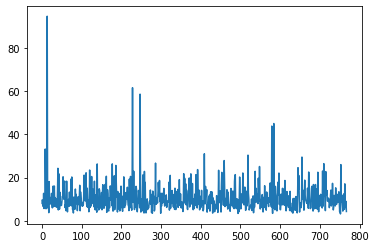

In [9]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [10]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 18)
outlier_index

(array([  8,  13,  18,  40,  43,  53,  57,  62,  73,  75, 106, 111, 120,
        125, 132, 139, 162, 177, 182, 186, 187, 206, 220, 223, 228, 231,
        247, 248, 254, 258, 286, 296, 323, 346, 357, 359, 360, 371, 375,
        388, 392, 409, 445, 453, 458, 459, 485, 486, 487, 498, 506, 519,
        537, 545, 548, 579, 584, 597, 612, 645, 647, 655, 662, 672, 695,
        707, 710, 715, 753], dtype=int64),)

In [11]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
18,1,103,30,38,83,43.3,0.183,33,0
40,3,180,64,25,70,34.0,0.271,26,0
43,9,171,110,24,240,45.4,0.721,54,1
...,...,...,...,...,...,...,...,...,...
695,7,142,90,24,480,30.4,0.128,43,1
707,2,127,46,21,335,34.4,0.176,22,0
710,3,158,64,13,387,31.2,0.295,24,0
715,7,187,50,33,392,33.9,0.826,34,1


In [12]:
outlier_index

(array([  8,  13,  18,  40,  43,  53,  57,  62,  73,  75, 106, 111, 120,
        125, 132, 139, 162, 177, 182, 186, 187, 206, 220, 223, 228, 231,
        247, 248, 254, 258, 286, 296, 323, 346, 357, 359, 360, 371, 375,
        388, 392, 409, 445, 453, 458, 459, 485, 486, 487, 498, 506, 519,
        537, 545, 548, 579, 584, 597, 612, 645, 647, 655, 662, 672, 695,
        707, 710, 715, 753], dtype=int64),)

In [13]:
df.iloc[outlier_index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
18,1,103,30,38,83,43.3,0.183,33,0
40,3,180,64,25,70,34.0,0.271,26,0
43,9,171,110,24,240,45.4,0.721,54,1
...,...,...,...,...,...,...,...,...,...
695,7,142,90,24,480,30.4,0.128,43,1
707,2,127,46,21,335,34.4,0.176,22,0
710,3,158,64,13,387,31.2,0.295,24,0
715,7,187,50,33,392,33.9,0.826,34,1


In [14]:
df.shape

(768, 9)

In [15]:
data = df.drop(df.index[outlier_index])

In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


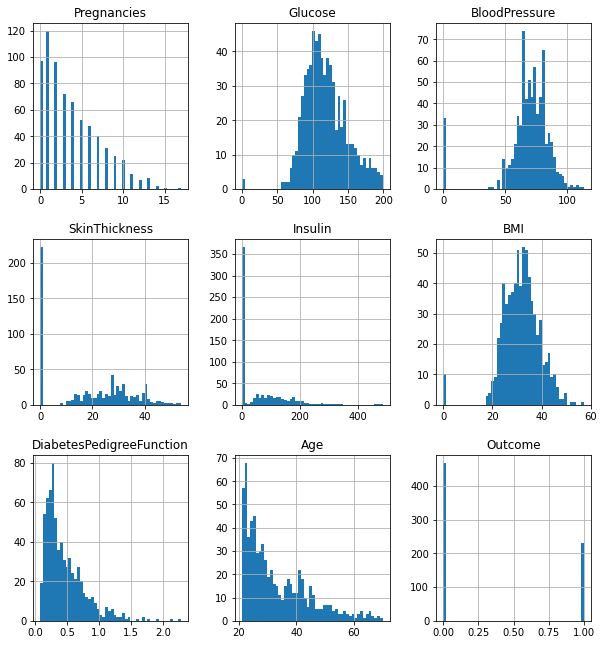

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(10,11))
plt.savefig("attribute_histogram_plots")
plt.show()

In [18]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [19]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [21]:
x

array([[ 0.65124795,  0.98632784,  0.16057831, ...,  0.25053437,
         0.52104336,  1.53248577],
       [-0.85411686, -1.1333793 , -0.15456695, ..., -0.67276508,
        -0.34937296, -0.15669537],
       [ 1.25339387,  2.16394292, -0.25961537, ..., -1.10803483,
         0.66295907, -0.0677911 ],
       ...,
       [ 0.35017499,  0.07788192,  0.16057831, ..., -0.72552505,
        -0.68366329, -0.24559964],
       [-0.85411686,  0.24611265, -0.46971221, ..., -0.21111536,
        -0.35568032,  1.26577296],
       [-0.85411686, -0.86421014,  0.05552989, ..., -0.17154538,
        -0.46290552, -0.86792953]])

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 699, dtype: int64

In [23]:
y = y.to_numpy()

In [24]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,

In [25]:
x.shape

(699, 8)

In [26]:
y.shape

(699,)

In [27]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(699, 8, 1)


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.3) 

In [30]:
xtrain.shape

(489, 8, 1)

In [31]:
ytrain.shape

(489,)

In [32]:
#n_timesteps, n_features, n_outputs = xtrain.shape[1], xtrain.shape[2], ytrain.shape

In [33]:
 from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D

In [34]:
from keras.layers.core import Dropout
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from keras.models import Sequential


In [69]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(106, activation='relu'))
#model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
history=model.fit(xtrain,ytrain, batch_size=32,epochs=50,validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 7.2891 - accuracy: 0.2327 - val_loss: 1.7364 - val_accuracy: 0.7143
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 1.1037 - accuracy: 0.6573 - val_loss: 0.6378 - val_accuracy: 0.6837
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6436 - accuracy: 0.6777 - val_loss: 0.6183 - val_accuracy: 0.7449
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6112 - accuracy: 0.6854 - val_loss: 0.5881 - val_accuracy: 0.7449
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5807 - accuracy: 0.6931 - val_loss: 0.5606 - val_accuracy: 0.7449
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5572 - accuracy: 0.6829 - val_loss: 0.5439 - val_accuracy: 0.7449
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.5434 - accuracy: 0.6982 - val_loss: 0.5287 - val_accuracy: 0.7347
Epoch 8/50
13/13 [=

In [71]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7667


[0.542364239692688, 0.7666666507720947]

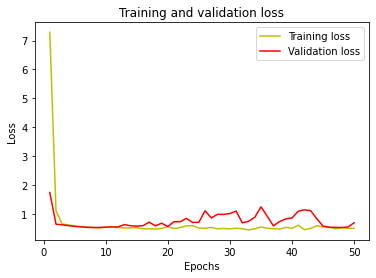

In [72]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

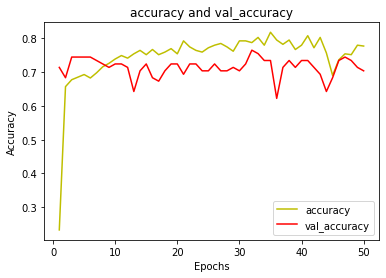

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='accuracy')
plt.plot(epochs, val_acc, 'r', label='val_accuracy')
plt.title('accuracy and val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
from tensorflow.keras.layers import BatchNormalization

In [44]:

import keras
from keras import layers
import tensorflow as tf
from keras.utils import np_utils
from keras import Sequential
from tensorflow.keras.layers import LSTM,Flatten,Activation,Conv1D,SpatialDropout1D
from tensorflow.keras.layers import Dense, Embedding,MaxPooling1D
from tensorflow.keras.layers import Dropout,Bidirectional,BatchNormalization

In [45]:

traffic = Sequential()

traffic.add(Conv1D(128,  (11), (4), padding='same',input_shape=(8,1)))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(MaxPooling1D((2), (2), padding='same'))

traffic.add(Conv1D(256, (3), (1), padding='same'))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))

traffic.add(Conv1D(512, (3), (1), padding='same'))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(MaxPooling1D((2), (2), padding='same'))

traffic.add(Flatten())
traffic.add(Dense(512))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(Dropout(0.8))

traffic.add(Dense(128))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(Dropout(0.8))

traffic.add(Dense(64))
traffic.add(BatchNormalization())
traffic.add(Activation('relu'))
traffic.add(Dropout(0.8))

traffic.add(Dense(3))
traffic.add(BatchNormalization())
traffic.add(Activation('softmax'))

traffic.summary()
traffic.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = traffic.fit(x,y,batch_size=128,shuffle = False,epochs=100,verbose=1,validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2, 128)            1536      
                                                                 
 batch_normalization_7 (Batc  (None, 2, 128)           512       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 2, 128)            0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 256)            98560     
                                                                 
 batch_normalization_8 (Batc  (None, 1, 256)          

In [46]:
traffic.evaluate(xtest,ytest)

7/7 [==============================] - 0s 6ms/step - loss: 0.4701 - accuracy: 0.9238


[0.47013330459594727, 0.9238095283508301]